In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [4]:
crm=pd.read_csv(r'C:\Users\J Loureiro\Desktop\Enterprise Data Science and Advanced Analytics\Data Science and Machine Learning\Project 1\crm.csv')

In [4]:
#1.1-- DATA EXPLORATION I
#we start by exploring the shape and basic characteristics of our data frame

crm

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0
1,19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0
2,29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0
3,12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1
4,21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0
...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0
6996,17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0
6997,29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1
6998,23312,Miss Angela Murray,1989,Graduation,Single,44867.0,1,0


In [5]:
crm[crm.duplicated()]

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18


In [6]:
crm.head()

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0
1,19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0
2,29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0
3,12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1
4,21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0


In [7]:
crm.tail()

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
6995,30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0
6996,17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0
6997,29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1
6998,23312,Miss Angela Murray,1989,Graduation,Single,44867.0,1,0
6999,15581,Miss Diana Taylor,1960,Graduation,Single,124379.0,0,0


In [8]:
crm.shape

(7000, 8)

In [9]:
crm.describe()

,CustomerID,Birthyear,Income,Kid_Younger6,Children_6to18
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,20066.401571,1976.451429,77988.962407,0.440571,0.490571
std,8684.030062,11.996270,35409.810253,0.543477,0.542174
min,5078.000000,1948.000000,2493.800000,0.000000,0.000000
25%,12507.500000,1967.000000,51586.250000,0.000000,0.000000
50%,20099.000000,1977.000000,77190.000000,0.000000,0.000000
75%,27587.750000,1985.000000,102016.250000,1.000000,1.000000
max,35072.000000,2005.000000,237639.725000,2.000000,2.000000


In [10]:
crm.isnull().sum()

CustomerID         0
Name               0
Birthyear          0
Education         14
Marital_Status     0
Income             0
Kid_Younger6       0
Children_6to18     0
dtype: int64

In [11]:
crm.dtypes

CustomerID          int64
Name               object
Birthyear           int64
Education          object
Marital_Status     object
Income            float64
Kid_Younger6        int64
Children_6to18      int64
dtype: object

In [12]:
crm['Birthyear'].value_counts()

1985    242
1981    238
1983    231
1982    226
1979    220
1984    217
1977    214
1980    207
1986    198
1976    197
1978    186
1967    170
1974    169
1988    166
1963    164
1987    159
1965    159
1964    159
1989    158
1970    158
1975    157
1960    155
1966    154
1968    149
1973    147
1972    146
1962    146
1969    145
1961    141
1971    131
1959    130
1990    127
1991    123
1994    117
1993    115
1995    111
1958    102
1992    101
1957    100
1956     91
1997     84
1996     81
1998     67
1955     59
1954     59
1999     35
1953     34
2000     29
1952     26
2001     22
1950     21
1951     19
2002     17
1949      6
2003      6
2005      4
1948      4
2004      1
Name: Birthyear, dtype: int64

In [13]:
crm['Kid_Younger6'].value_counts()

0    4087
1    2742
2     171
Name: Kid_Younger6, dtype: int64

In [14]:
crm['Children_6to18'].value_counts()

0    3720
1    3126
2     154
Name: Children_6to18, dtype: int64

In [15]:
crm

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0
1,19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0
2,29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0
3,12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1
4,21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0
...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0
6996,17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0
6997,29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1
6998,23312,Miss Angela Murray,1989,Graduation,Single,44867.0,1,0


In [16]:
crm['Education'].value_counts()

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

In [17]:
income_ktsis=crm['Income'].kurtosis()
income_ktsis

2.649035217952049

In [18]:
#It's likely that 'graduation', 'phd', 'master', highschool and their uppercase doppelgangers are the same
#still, we should investigate

crm.groupby('Education')['Income'].mean()

Education
Basic         33366.445670
Graduation    77923.822877
HighSchool    70545.480354
Master        81469.655573
PhD           84188.999950
graduation    73449.000000
highschool    86983.500000
master        76795.428571
phd           69286.000000
Name: Income, dtype: float64

In [19]:
#the incomes for the the lower case and the upper case categories in the column is similar, it's safe assume
#that the lower case categories were probably mistyped

#Let's follow a similar process for the Marital_Status column

In [20]:
crm['Marital_Status'].value_counts()

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

In [21]:
crm.groupby('Marital_Status')['Income'].mean()

Marital_Status
Divorced     80689.432221
Married      77664.781343
Single       75661.349869
Together     78030.038993
Widow        88228.212449
divorced    123550.228125
married      71674.269444
single       81034.692308
together     81630.317391
widow        42521.850000
Name: Income, dtype: float64

In [22]:
#the difference here is more significant, especially between 'divorced' and 'Divorced'. Let's quickly investigate:

crm[crm['Marital_Status'] == 'divorced']

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
203,19589,Mr. Michael Bower,1968,PhD,divorced,124106.000,0,0
1201,14525,Mr. Adrian Abraham,1978,Master,divorced,89875.000,0,1
2088,20447,Mr. Dan Berry,1985,Master,divorced,141006.000,1,0
2747,28403,Mr. Brian North,1967,Graduation,divorced,111567.000,0,1
4151,29048,Mr. Sam McLean,1956,PhD,divorced,98171.000,0,1
4306,8558,Mr. Eric Howard,1977,PhD,divorced,234963.825,0,1
6111,21188,Mr. Charles Payne,1957,Graduation,divorced,120170.000,0,0
6654,5303,Mr. Nicholas Lawrence,1979,PhD,divorced,68543.000,1,1


In [23]:
crm[crm['Marital_Status'] == 'Divorced']

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
7,33803,Mr. Nathan Wallace,1981,PhD,Divorced,71692.0,0,1
20,19667,Mr. Christopher King,1973,PhD,Divorced,127559.0,0,0
27,14387,Mr. Luke Thomson,1963,Graduation,Divorced,75447.0,0,2
29,21338,Mr. Jonathan White,1960,PhD,Divorced,62368.0,1,1
37,18890,Mrs. Felicity Hunter,1972,Graduation,Divorced,102567.0,0,1
...,...,...,...,...,...,...,...,...
6944,32891,Mr. Austin Slater,1974,Graduation,Divorced,41767.0,0,2
6960,31913,Mr. Jason Sanderson,1977,Master,Divorced,118418.0,0,1
6965,32039,Mr. Thomas Hamilton,1965,HighSchool,Divorced,39464.0,1,1
6995,30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0


In [24]:
#there doesn't seem to be any irregular values
#Let's normalize these columns

crm['Education'] = crm['Education'].str.upper()

In [25]:
#as we can see, we have reduced the number of distinct categories by transforming the values to uppercase
crm['Education'].unique()

array(['GRADUATION', 'PHD', 'HIGHSCHOOL', 'MASTER', 'BASIC', nan],
      dtype=object)

In [26]:
#let's apply a similar normalization to the Marital_Status column

crm['Marital_Status']=crm['Marital_Status'].str.upper()
crm['Marital_Status']

0         SINGLE
1       TOGETHER
2       TOGETHER
3        MARRIED
4         SINGLE
          ...   
6995    DIVORCED
6996    DIVORCED
6997    TOGETHER
6998      SINGLE
6999      SINGLE
Name: Marital_Status, Length: 7000, dtype: object

In [27]:
crm.head()

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,14594,Miss Leah Lewis,1981,GRADUATION,SINGLE,113947.0,0,0
1,19070,Miss Grace Black,1974,GRADUATION,TOGETHER,114297.0,0,0
2,29888,Mr. Gavin Morrison,1960,PHD,TOGETHER,115476.0,0,0
3,12221,Mr. Ryan Glover,1980,GRADUATION,MARRIED,101172.0,1,1
4,21107,Mr. Paul Anderson,1971,HIGHSCHOOL,SINGLE,123128.0,0,0


In [28]:
#1.2 DATA VIZUALIZATION I

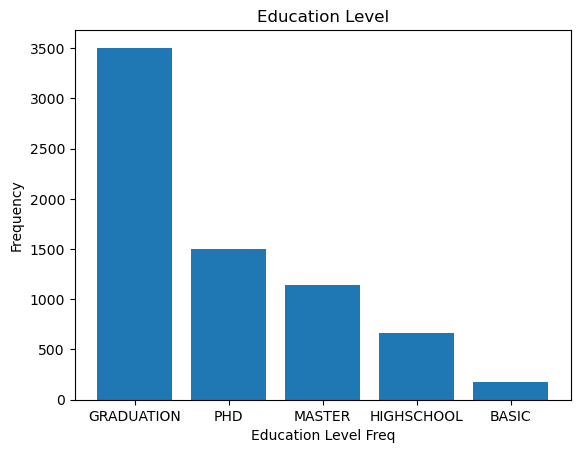

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

freq_dist = crm['Education'].value_counts()

plt.bar(freq_dist.index, freq_dist.values)

plt.xlabel('Education Level Freq')
plt.ylabel('Frequency')
plt.title('Education Level')

plt.show()

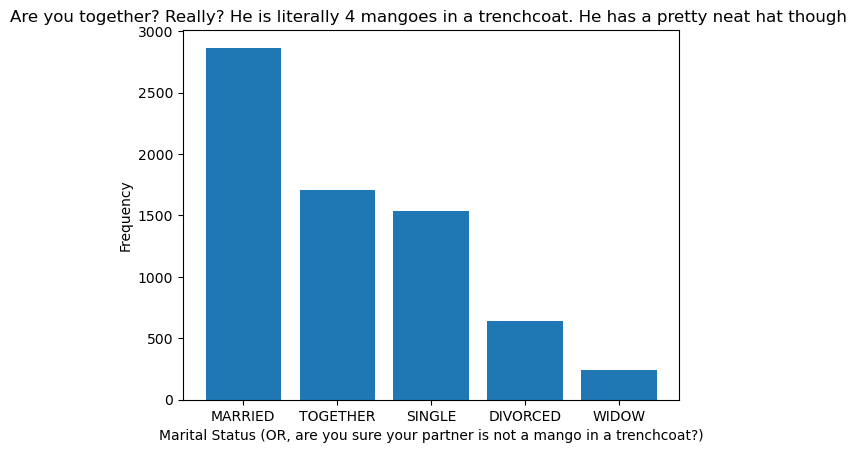

In [30]:
freq_dist = crm['Marital_Status'].value_counts()

plt.bar(freq_dist.index, freq_dist.values)

plt.xlabel('Marital Status (OR, are you sure your partner is not a mango in a trenchcoat?)')
plt.ylabel('Frequency')
plt.title('Are you together? Really? He is literally 4 mangoes in a trenchcoat. He has a pretty neat hat though ')
plt.show()

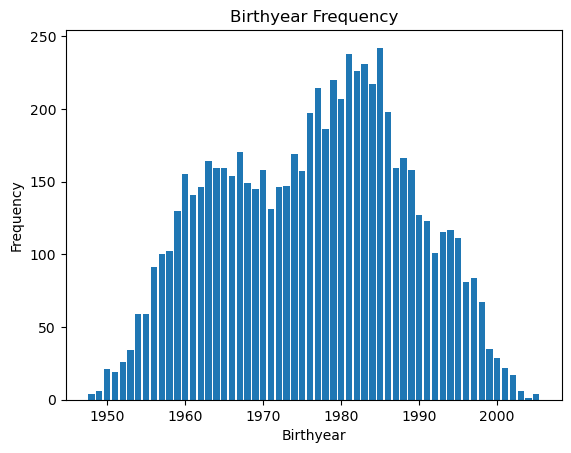

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

freq_dist = crm['Birthyear'].value_counts()

plt.bar(freq_dist.index, freq_dist.values)

plt.xlabel('Birthyear')
plt.ylabel('Frequency')
plt.title('Birthyear Frequency')

plt.show()

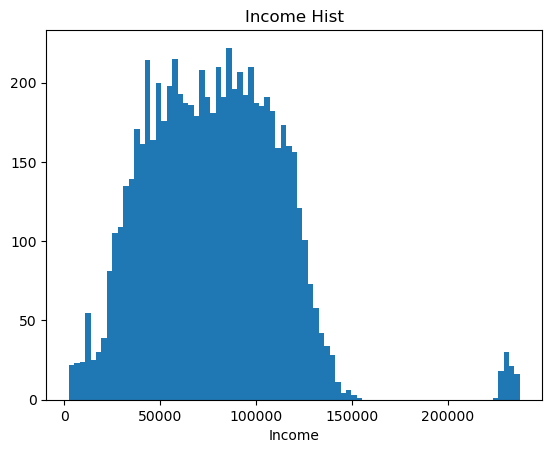

In [32]:
plt.hist(crm['Income'], bins=83)
plt.title('Income Hist')
plt.xlabel('Income')
plt.ylabel('')
plt.show()

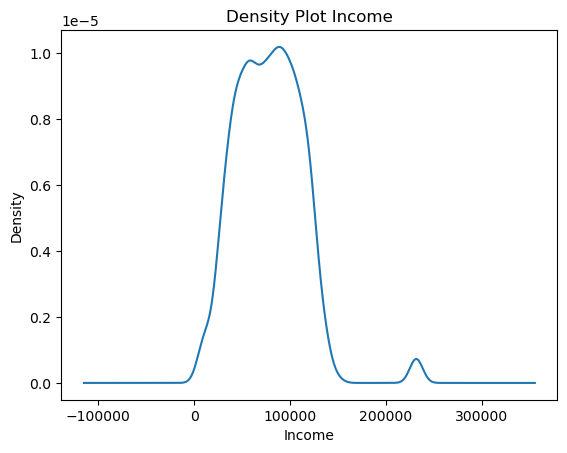

In [33]:
crm['Income'].plot.kde()

plt.title('Density Plot Income')
plt.xlabel('Income')
plt.ylabel('Density')

plt.show()

In [34]:
crm.head()

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,14594,Miss Leah Lewis,1981,GRADUATION,SINGLE,113947.0,0,0
1,19070,Miss Grace Black,1974,GRADUATION,TOGETHER,114297.0,0,0
2,29888,Mr. Gavin Morrison,1960,PHD,TOGETHER,115476.0,0,0
3,12221,Mr. Ryan Glover,1980,GRADUATION,MARRIED,101172.0,1,1
4,21107,Mr. Paul Anderson,1971,HIGHSCHOOL,SINGLE,123128.0,0,0


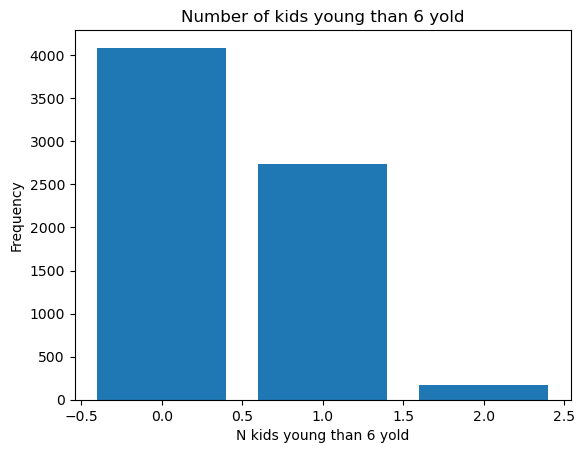

In [35]:
freq_dist = crm['Kid_Younger6'].value_counts()

plt.bar(freq_dist.index, freq_dist.values)

plt.xlabel('N kids young than 6 yold')
plt.ylabel('Frequency')
plt.title('Number of kids young than 6 yold')
plt.show()

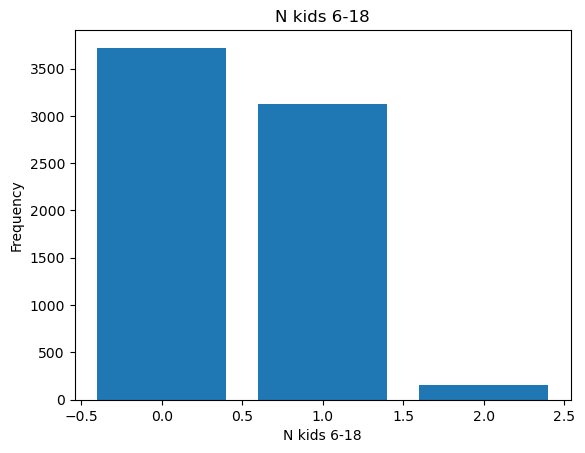

In [36]:
freq_dist = crm['Children_6to18'].value_counts()

plt.bar(freq_dist.index, freq_dist.values)

plt.xlabel('N kids 6-18')
plt.ylabel('Frequency')
plt.title('N kids 6-18')
plt.show()

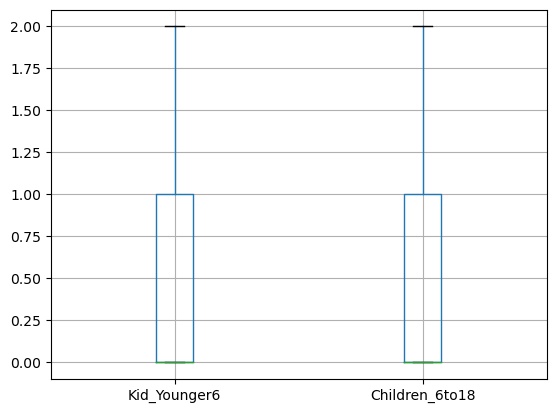

In [37]:
#1.3 OUTLIERS

import matplotlib.pyplot as plt


kids=crm.boxplot(column=['Kid_Younger6', 'Children_6to18'])
kids.plot()
plt.show() 

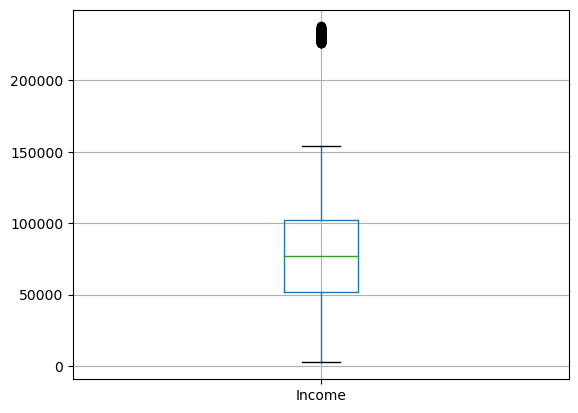

In [38]:
income=crm.boxplot(column='Income')
income.plot()
plt.show()
plt.show()

In [39]:
#we see a lot of values over the last quartile. We should investigate
#First, let's see if we can find a border for these values

Upper bound: 177661.25
Outliers: 5       232427.925
177     237639.725
282     227406.225
596     229052.725
614     233789.525
           ...    
6749    231427.925
6755    227063.725
6877    232511.725
6909    228039.225
6922    236745.625
Name: Income, Length: 86, dtype: float64


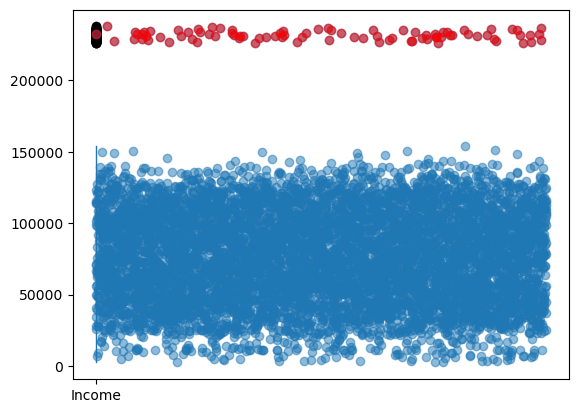

In [40]:
# create a box plot of the 'Income' column
income_boxplot = crm.boxplot(column='Income')

# calculate the IQR of the 'Income' column
q1 = crm['Income'].quantile(0.25)
q3 = crm['Income'].quantile(0.75)
iqr = q3 - q1

# calculate the upper bound for outliers
upper_bound = q3 + 1.5*iqr

# identify any values in the 'Income' column that are above the upper bound
outliers = crm[crm['Income'] > upper_bound]['Income']

# print the upper bound and any identified outliers
print('Upper bound:', upper_bound)
print('Outliers:', outliers)

# plot the 'Income' column, highlighting any identified outliers in red
income_plot = crm['Income'].plot(style='o', alpha=0.5)
outliers.plot(style='o', color='red', alpha=0.5, ax=income_plot)

plt.show()

In [41]:
# find the highest and lowest outlier values
minmaxbound=((outliers.min(),outliers.max()))
minmaxbound

(225766.025, 237639.725)

In [42]:
#1.4 MISSING VALUES
#previously we saw that there were some missing values in the 'Education Column'

crm.isna().sum() #14 missing values

CustomerID         0
Name               0
Birthyear          0
Education         14
Marital_Status     0
Income             0
Kid_Younger6       0
Children_6to18     0
dtype: int64

In [43]:
#let's look further

crm[crm["Education"].isna()]

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
182,8822,Mr. Ian Burgess,1994,NaN,SINGLE,124704.0,0,0
779,24848,Mr. Richard Miller,1972,NaN,SINGLE,91147.0,0,1
1022,6416,Mr. James Vaughan,1955,NaN,MARRIED,34080.0,0,0
2295,8141,Mr. Benjamin Russell,1987,NaN,MARRIED,24666.0,1,0
2357,6917,Mr. Justin Quinn,1985,NaN,MARRIED,37036.0,1,0
2392,16673,Miss Andrea McLean,1964,NaN,SINGLE,58852.0,0,0
2778,23897,Mr. Eric Jones,1958,NaN,TOGETHER,105410.0,0,0
2924,19346,Mr. Brian Ince,1967,NaN,MARRIED,43332.0,1,1
3703,34475,Mrs. Ella May,1964,NaN,MARRIED,78465.0,0,1
4219,14423,Mrs. Ava Rees,1974,NaN,MARRIED,88447.0,0,1


In [44]:
#we're gonna build a quick function that tells shows us the row with missing values on the 'Education' column 
#along with the neighbouring rows

def get_missing_values_in_column(df, column):
    """
    Returns a list of the row indices that contain missing values in a certain column of a pandas DataFrame.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame to check for missing values.
    column : str
        The name of the column to check for missing values.

    Returns:
    --------
    list
        A list of the row indices that contain missing values in the specified column.
    """

    # Identify missing values in the specified column
    missing = df[column].isnull()

    # Get rows with missing values in the specified column
    missing_rows = df[missing].index.tolist()

    return missing_rows


missing_values_rows=get_missing_values_in_column(crm, 'Education')

def check_vicinity_missing(crm, missing_values_rows):
    def get_range(n):
        return list(range(n-2, n+3))
    #shows the vicinity of every row where Education has a missing value
    #pass a sublist of missing values list if you only want a specifc rowor rows
    result = pd.DataFrame()
    for i in missing_values_rows:
        subset = crm.iloc[get_range(i)]
        result = pd.concat([result, subset])
    return result

a=check_vicinity_missing(crm, missing_values_rows)
print(a.to_string(max_rows=None))

      CustomerID                    Name  Birthyear   Education Marital_Status    Income  Kid_Younger6  Children_6to18
180        15089      Mr. Carl Underwood       1964  GRADUATION       TOGETHER  130186.0             0               0
181        13682         Mrs. Joan White       1973  GRADUATION        MARRIED   70333.0             2               1
182         8822         Mr. Ian Burgess       1994         NaN         SINGLE  124704.0             0               0
183         9929       Mrs. Hannah Kelly       1982  GRADUATION        MARRIED   82262.0             1               0
184        28340       Mr. Dominic Brown       1988  GRADUATION        MARRIED   55762.0             1               0
777        24614      Mr. Kevin Marshall       1986  GRADUATION        MARRIED   79517.0             0               1
778        34145         Mr. Colin Vance       1952      MASTER       DIVORCED  114252.0             0               0
779        24848      Mr. Richard Miller       1

In [45]:
#Nothing seems abnormal
#Let's substitute our missing values with the mode

crm['Education'] = crm['Education'].fillna(crm['Education'].mode()[0])

#and verify if we changed the data frame

len(crm[crm["Education"].isna()])

0

In [46]:
#we verify for missing values
crm[crm["Education"].isna()]

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18


In [47]:
#no missing values

In [48]:
#2-- DATA EXPLORATION II & DATA VIZUALIZATION II

#2.1 INCOME BASE GROUPING

In [49]:
#Let's explore some relationships between variables

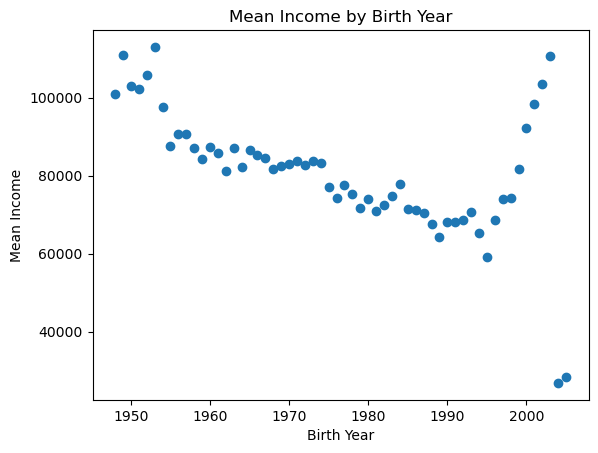

In [50]:
#Average Income, std, min max income per birthyear

average_income_by_age=crm.groupby('Birthyear').agg({'Income': ['mean', 'std','max','min']})
average_income_by_age

import matplotlib.pyplot as plt

data_test = {'Birthyear': [1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005],
        'Income': [100980.750000, 110904.000000, 103104.082143, 102237.315789, 105717.135577, 113013.136029, 97718.198305, 87617.666525, 90628.021429, 90618.794250, 87115.841667, 84202.088846, 87259.881774, 85878.795213, 81205.416781, 87218.163720, 82098.532233, 86533.231132, 85249.506494, 84582.128235, 81818.735067, 82603.377069, 82959.435759, 83836.195420, 82621.687158, 83834.614966, 83213.463462, 77153.752070, 74397.045178, 77501.643107, 75378.660081, 71754.239205, 74098.170894, 70965.715231, 72510.527544, 74797.055952, 77819.780184, 71541.578202, 71285.672475, 70408.381447, 67530.588253, 64281.237025, 68220.678740, 68063.134756, 68540.485396, 70785.576739, 65233.145726, 59201.864865, 68696.245679, 74030.390774, 74301.467164, 81754.571429, 92170.449138, 98342.454545, 103516.335294, 110665.833333, 26867.000000, 28488.000000]}

df = pd.DataFrame(data_test)
# Extract the data for plotting
x = df['Birthyear']  #.index[::-1]
y = df['Income']

# Create the scatterplot
plt.scatter(x, y)

# Set the title and axis labels
plt.title('Mean Income by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Mean Income')

# Display the plot
plt.show()

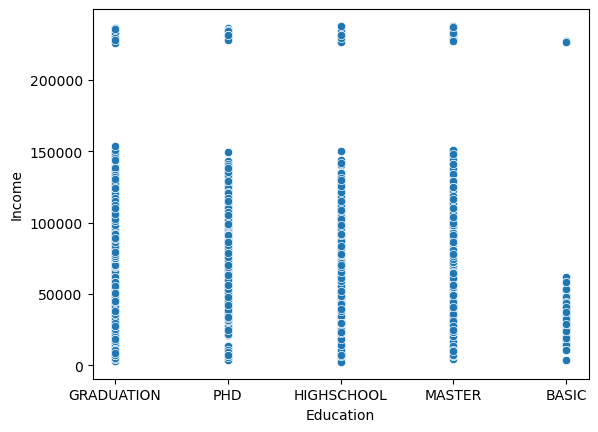

In [51]:
#INCOMES and Education

import seaborn as sns

# Create a scatterplot with categorical variable on x-axis and quantitative variable on y-axis
sns.scatterplot(x=crm['Education'], y=crm['Income'], data=crm)

# Show the plot
plt.show()

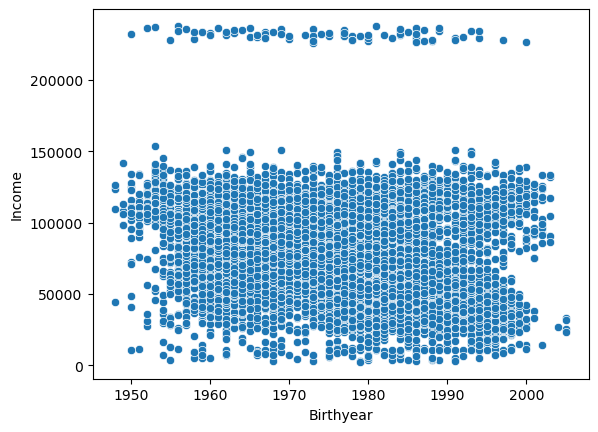

In [52]:
#INCOME AND BIRTHYEAR

import seaborn as sns

# Create a scatterplot with categorical variable on x-axis and quantitative variable on y-axis
sns.scatterplot(x=crm['Birthyear'], y=crm['Income'], data=crm)

# Show the plot
plt.show()

In [53]:
#inconsistent values check

filtered_df = df[(df['Birthyear'] > 2003) & (df['Income'].notnull())]

# Print the filtered data
print(filtered_df)

    Birthyear   Income
56       2004  26867.0
57       2005  28488.0


In [54]:
#descriptive Income stats grouped by the number of kids under 6 years old

average_income_by_kidsyounger=crm.groupby('Kid_Younger6').agg({'Income': ['mean', 'std','max','min']})
average_income_by_kidsyounger

Income                                  
                      mean           std         max     min
Kid_Younger6                                                
0             92348.276872  31863.532884  237639.725  3005.4
1             57699.110941  29662.500323  235245.525  2493.8
2             60142.497515  33394.790824  228750.025  4609.6

In [55]:
#descriptive Income stats grouped by the number of kids under between 6 and 18 years old

average_income_by_kids6_18=crm.groupby('Children_6to18').agg({'Income': ['mean', 'std', 'max','min']})
average_income_by_kids6_18

Income                                  
                        mean           std         max     min
Children_6to18                                                
0               77269.154859  40511.089285  237639.725  2493.8
1               78927.742498  28670.515331  235245.525  3909.6
2               76320.504708  25365.538093  232427.925  4901.4

In [56]:
#MORE COMPLEX AGGREGATIONS

average_income_by_mstatus_birthyear=crm.groupby(['Marital_Status','Birthyear']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_mstatus_birthyear

Income                                  
                                   mean           std       max       min
Marital_Status Birthyear                                                 
DIVORCED       1948       109812.000000           NaN  109812.0  109812.0
               1949       124992.000000  23631.508627  141702.0  108282.0
               1950       110505.000000           NaN  110505.0  110505.0
               1951       115482.500000   6872.370806  120342.0  110623.0
               1952       104861.500000  22600.874268  127759.0   74599.0
...                                 ...           ...       ...       ...
WIDOW          1983       103815.666667   7028.766630  111930.0   99611.0
               1984        88973.000000  33105.325282  112382.0   65564.0
               1985        56635.000000   1647.558800   57800.0   55470.0
               1987        24773.000000           NaN   24773.0   24773.0
               1988        71078.000000  60307.723154  113722.0   28434.0

[256 rows x 4 columns]

In [57]:
average_income_by_birthyear_mstatus=crm.groupby(['Birthyear','Marital_Status']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_birthyear_mstatus

Income                                  
                                   mean           std       max       min
Birthyear Marital_Status                                                 
1948      DIVORCED        109812.000000           NaN  109812.0  109812.0
          MARRIED          44329.000000           NaN   44329.0   44329.0
          TOGETHER        124891.000000   2040.710171  126334.0  123448.0
1949      DIVORCED        124992.000000  23631.508627  141702.0  108282.0
          MARRIED         105797.000000           NaN  105797.0  105797.0
...                                 ...           ...       ...       ...
2002      SINGLE          110413.800000  14072.840737  125359.0   92641.0
          TOGETHER         99786.000000  14120.599456  116091.0   91594.0
2003      SINGLE          110665.833333  20076.435634  133262.0   86711.0
2004      SINGLE           26867.000000           NaN   26867.0   26867.0
2005      SINGLE           28488.000000   4920.719527   33132.0   23147.0

[256 rows x 4 columns]

In [58]:
average_income_by_kidsyounger_mst=crm.groupby(['Kid_Younger6','Marital_Status']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_kidsyounger_mst

Income                                   
                                     mean           std         max      min
Kid_Younger6 Marital_Status                                                 
0            DIVORCED        93620.250564  31323.132448  235129.425   5171.2
             MARRIED         92170.949215  31013.184159  237639.725   3005.4
             SINGLE          90847.119368  31867.126108  233586.125   8031.3
             TOGETHER        92613.841559  32737.746656  237322.825   3623.7
             WIDOW           96620.613324  35398.467794  236745.625   9709.1
1            DIVORCED        61279.302074  38452.858238  231612.325   2493.8
             MARRIED         57606.409224  29170.483454  231400.125   3909.6
             SINGLE          57072.725038  29087.641117  233887.325   3550.0
             TOGETHER        56700.594111  28204.308620  235245.525   3265.8
             WIDOW           63575.600000  19947.489157  104450.000  24773.0
2            DIVORCED        58831.176471  30932.058077  128925.000  16298.0
             MARRIED         57579.840074  32806.864989  226404.025   4609.6
             SINGLE          64238.093889  32901.415300  227406.225  21657.0
             TOGETHER        61923.211184  36301.336299  228750.025  11000.0
             WIDOW           41670.566667  41248.629299   87361.000   7174.7

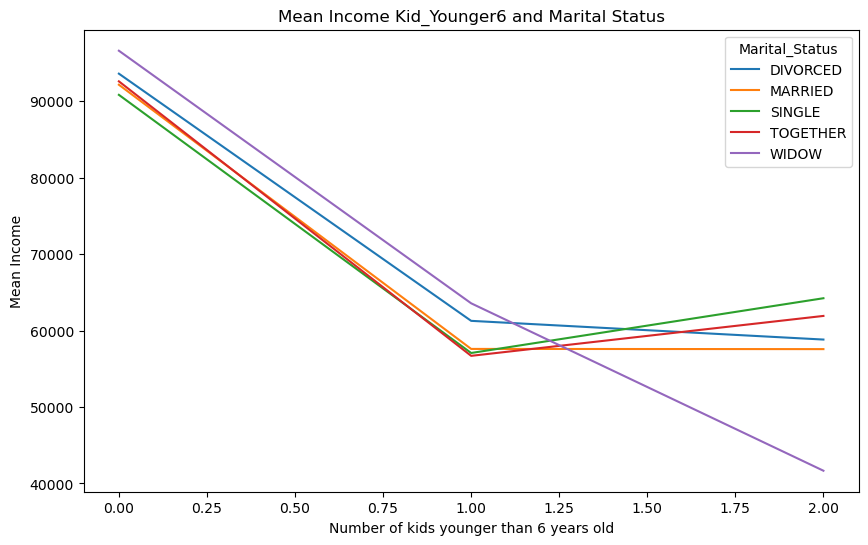

In [59]:
import matplotlib.pyplot as plt

# Create a line plot of mean income values
crm.groupby(['Kid_Younger6', 'Marital_Status']).mean()['Income'].unstack().plot(figsize=(10, 6))

# Add axis labels and title
plt.xlabel('Number of kids younger than 6 years old')
plt.ylabel('Mean Income')
plt.title('Mean Income Kid_Younger6 and Marital Status')
plt.show()

In [60]:
average_income_by_mst_kidsyounger=crm.groupby(['Marital_Status','Kid_Younger6']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_mst_kidsyounger

Income                                   
                                     mean           std         max      min
Marital_Status Kid_Younger6                                                 
DIVORCED       0             93620.250564  31323.132448  235129.425   5171.2
               1             61279.302074  38452.858238  231612.325   2493.8
               2             58831.176471  30932.058077  128925.000  16298.0
MARRIED        0             92170.949215  31013.184159  237639.725   3005.4
               1             57606.409224  29170.483454  231400.125   3909.6
               2             57579.840074  32806.864989  226404.025   4609.6
SINGLE         0             90847.119368  31867.126108  233586.125   8031.3
               1             57072.725038  29087.641117  233887.325   3550.0
               2             64238.093889  32901.415300  227406.225  21657.0
TOGETHER       0             92613.841559  32737.746656  237322.825   3623.7
               1             56700.594111  28204.308620  235245.525   3265.8
               2             61923.211184  36301.336299  228750.025  11000.0
WIDOW          0             96620.613324  35398.467794  236745.625   9709.1
               1             63575.600000  19947.489157  104450.000  24773.0
               2             41670.566667  41248.629299   87361.000   7174.7

In [61]:
average_income_by_birthyear_kidyounger=crm.groupby(['Birthyear','Kid_Younger6']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_birthyear_kidyounger

Income                                   
                                 mean           std         max      min
Birthyear Kid_Younger6                                                  
1948      0             100980.750000  38448.998092  126334.000  44329.0
1949      0             110904.000000  16101.378264  141702.000  98212.0
1950      0             103104.082143  43255.056050  232093.025  10772.7
1951      0             102237.315789  27050.955305  134111.000  11205.0
1952      0             105717.135577  39948.559881  236158.525  27432.0
...                               ...           ...         ...      ...
2001      1              38183.000000           NaN   38183.000  38183.0
2002      0             103516.335294  27717.063446  133005.000  14060.7
2003      0             110665.833333  20076.435634  133262.000  86711.0
2004      0              26867.000000           NaN   26867.000  26867.0
2005      0              28488.000000   4920.719527   33132.000  23147.0

[145 rows x 4 columns]

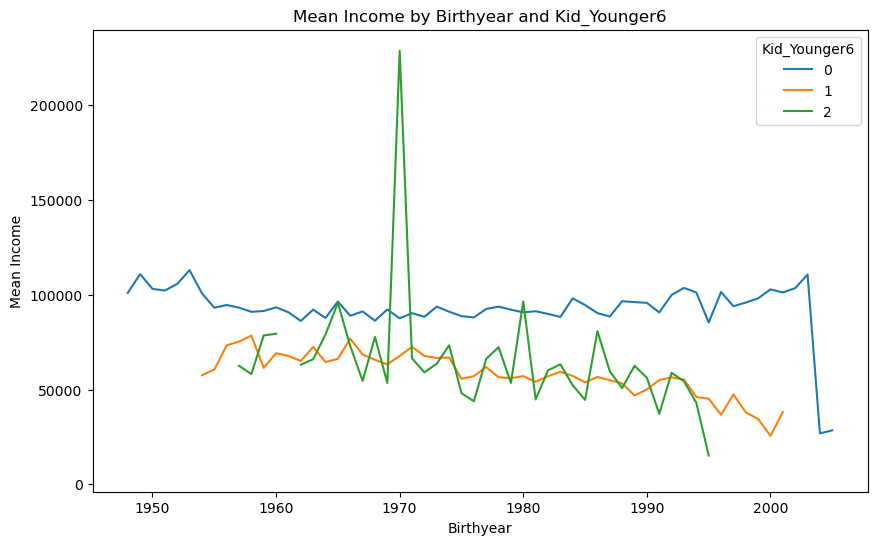

In [62]:
import matplotlib.pyplot as plt

# Create a line plot of mean income values
crm.groupby(['Birthyear', 'Kid_Younger6']).mean()['Income'].unstack().plot(figsize=(10, 6))

# Add axis labels and title
plt.xlabel('Birthyear')
plt.ylabel('Mean Income')
plt.title('Mean Income by Birthyear and Kid_Younger6')
plt.show()

In [63]:
average_income_by_younger_birthyear=crm.groupby(['Kid_Younger6','Birthyear']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_younger_birthyear

Income                                   
                                 mean           std         max      min
Kid_Younger6 Birthyear                                                  
0            1948       100980.750000  38448.998092  126334.000  44329.0
             1949       110904.000000  16101.378264  141702.000  98212.0
             1950       103104.082143  43255.056050  232093.025  10772.7
             1951       102237.315789  27050.955305  134111.000  11205.0
             1952       105717.135577  39948.559881  236158.525  27432.0
...                               ...           ...         ...      ...
2            1991        37193.400000  21782.730682   49766.000   4609.6
             1992        58815.333333  25128.240972   87762.000  42611.0
             1993        54364.000000  15399.200596   66477.000  37034.0
             1994        42993.000000  18921.824267   66651.000  15968.0
             1995        15160.333333   3724.189353   18183.000  11000.0

[145 rows x 4 columns]

In [64]:
#and so on, we could do nested aggregations by Children_6to18 and Marital_Status, Birthyear, Income, or a combination of
#Marital_ Status, Birthyear; aggregating via income (mean, std, max and min)

duck='duck'

In [65]:
#2.2 CATEGORICAL VARIABLES (CONTINGENCY TABLES AND OTHERS)

ct_Education_Status= pd.crosstab(crm['Education'], crm['Marital_Status'])

print(ct_Education_Status)

Marital_Status  DIVORCED  MARRIED  SINGLE  TOGETHER  WIDOW
Education                                                 
BASIC                 12       71      51        42      3
GRADUATION           311     1416     815       867    109
HIGHSCHOOL            57      264     170       161     13
MASTER               114      513     212       255     48
PHD                  151      602     290       381     72


In [66]:
#IDEA for creativity points: if there's a regularity on the times of visit of groups of customers we could do time series analysis

ct_Birthyear_Status= pd.crosstab(crm['Birthyear'], crm['Marital_Status'])
print(ct_Birthyear_Status)

Marital_Status  DIVORCED  MARRIED  SINGLE  TOGETHER  WIDOW
Birthyear                                                 
1948                   1        1       0         2      0
1949                   2        1       0         1      2
1950                   1        4       4         7      5
1951                   2        5       1         7      4
1952                   4        9       3         6      4
1953                   1       13       3        12      5
1954                   7       25       7        12      8
1955                   5       23       9        13      9
1956                  15       38       7        22      9
1957                  11       46       5        25     13
1958                  10       39       7        24     22
1959                   8       51      29        40      2
1960                  16       43      35        46     15
1961                  16       61      21        36      7
1962                  13       59      25        36     

In [67]:
ct_Birthyear_Grad= pd.crosstab(crm['Birthyear'], crm['Education'])
print(ct_Birthyear_Grad)

Education  BASIC  GRADUATION  HIGHSCHOOL  MASTER  PHD
Birthyear                                            
1948           0           0           0       0    4
1949           0           0           0       0    6
1950           0           0           0       6   15
1951           0           1           0       6   12
1952           0           7           0       7   12
1953           0          12           0      14    8
1954           0          29           1      11   18
1955           0          26           2       5   26
1956           1          27           5      24   34
1957           0          34           7      31   28
1958           0          38           2      20   42
1959           0          67           3      27   33
1960           0          76          13      30   36
1961           0          68          15      26   32
1962           5          69          19      17   36
1963           1          81          14      35   33
1964           1          87

In [68]:
ct_status_Grad= pd.crosstab(crm['Marital_Status'], crm['Education'])
ct_status_Grad

Education,BASIC,GRADUATION,HIGHSCHOOL,MASTER,PHD
Marital_Status,,,,,
DIVORCED,12,311,57,114,151
MARRIED,71,1416,264,513,602
SINGLE,51,815,170,212,290
TOGETHER,42,867,161,255,381
WIDOW,3,109,13,48,72


In [69]:
#2.3 REMAINING AGGREGATIONS


average_income_by_mstatus=crm.groupby('Marital_Status').agg({'Income': ['mean', 'std','max','min']})
average_income_by_mstatus


Income                                  
                        mean           std         max     min
Marital_Status                                                
DIVORCED        81221.038992  37463.428582  235129.425  2493.8
MARRIED         77589.534159  34802.313216  237639.725  3005.4
SINGLE          75706.768238  34940.770042  233887.325  3550.0
TOGETHER        78078.577330  35731.310804  237322.825  3265.8
WIDOW           87855.099286  35611.402827  236745.625  7174.7

In [70]:
average_income_by_kidsyounger=crm.groupby(['Kid_Younger6']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_kidsyounger

Income                                  
                      mean           std         max     min
Kid_Younger6                                                
0             92348.276872  31863.532884  237639.725  3005.4
1             57699.110941  29662.500323  235245.525  2493.8
2             60142.497515  33394.790824  228750.025  4609.6

In [71]:
average_income_by_kidsolder=crm.groupby(['Children_6to18']).agg({'Income': ['mean', 'std','max','min']})
average_income_by_kidsolder

Income                                  
                        mean           std         max     min
Children_6to18                                                
0               77269.154859  40511.089285  237639.725  2493.8
1               78927.742498  28670.515331  235245.525  3909.6
2               76320.504708  25365.538093  232427.925  4901.4

In [72]:
#Mean Income for people who don't have kids younger than 6 is slightly higher

In [73]:
count = crm['Kid_Younger6'].value_counts()[0]
print(count)
#this is a large part of our population that earns more than the mean
#Joining the tables would be a good way to try to find if this group spends more, less or how much more/how much less in the restaurant

4087


In [74]:
crm['Income'].mean()

77988.96240714283

In [75]:
#2.4 SPEARMAN CORRELATIONS

In [76]:
import scipy.stats as stats

# rank the education and marital_status columns
education_ranked = crm['Education'].rank()
marital_status_ranked = crm['Marital_Status'].rank()

# calculate the Spearman correlation coefficient and p-value
corr, p_value = stats.spearmanr(education_ranked, marital_status_ranked)

# print the result
print(f"EDU_MSTATUS: Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

EDU_MSTATUS: Spearman correlation coefficient: -0.010001093025673341
P-value: 0.40280453308920017


In [77]:
education_ranked = crm['Education'].rank()
marital_status_ranked = crm['Children_6to18'].rank()

corr, p_value = stats.spearmanr(education_ranked, marital_status_ranked)

print(f"EDU_Childre6to18: Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

EDU_Childre6to18: Spearman correlation coefficient: 0.0640218573621807
P-value: 8.27641867214842e-08


In [78]:
education_ranked = crm['Education'].rank()
marital_status_ranked = crm['Kid_Younger6'].rank()

corr, p_value = stats.spearmanr(education_ranked, marital_status_ranked)

print(f"EDU_Kid_Youngerthan6: Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

EDU_Kid_Youngerthan6: Spearman correlation coefficient: -0.05440131149479691
P-value: 5.261036402344549e-06


In [79]:
education_ranked = crm['Marital_Status'].rank()
marital_status_ranked = crm['Children_6to18'].rank()

corr, p_value = stats.spearmanr(education_ranked, marital_status_ranked)

print(f"mstatus_Kids6to18: Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

mstatus_Kids6to18: Spearman correlation coefficient: -0.02750269251042154
P-value: 0.02138797752361929


In [80]:
#3--DATA TRANSFORMATION

In [81]:
#3.1 birthyear into age


#first, we convert the birthyear to an 'age' column

import datetime
    
 #calculate the current year
current_year = datetime.datetime.now().year

 #create a new column 'age' by subtracting birth_year from current year
crm['age'] = current_year - crm['Birthyear']

# drop
crm = crm.drop('Birthyear', axis=1)



#check the changed table: age instead of birthyear
crm

,CustomerID,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,age
0,14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,42
1,19070,Miss Grace Black,GRADUATION,TOGETHER,114297.0,0,0,49
2,29888,Mr. Gavin Morrison,PHD,TOGETHER,115476.0,0,0,63
3,12221,Mr. Ryan Glover,GRADUATION,MARRIED,101172.0,1,1,43
4,21107,Mr. Paul Anderson,HIGHSCHOOL,SINGLE,123128.0,0,0,52
...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,PHD,DIVORCED,98968.0,0,0,29
6996,17210,Mr. Brandon Simpson,GRADUATION,DIVORCED,109977.0,0,0,38
6997,29186,Mr. Thomas Churchill,PHD,TOGETHER,56039.0,0,1,56
6998,23312,Miss Angela Murray,GRADUATION,SINGLE,44867.0,1,0,34


In [82]:
crm

,CustomerID,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,age
0,14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,42
1,19070,Miss Grace Black,GRADUATION,TOGETHER,114297.0,0,0,49
2,29888,Mr. Gavin Morrison,PHD,TOGETHER,115476.0,0,0,63
3,12221,Mr. Ryan Glover,GRADUATION,MARRIED,101172.0,1,1,43
4,21107,Mr. Paul Anderson,HIGHSCHOOL,SINGLE,123128.0,0,0,52
...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,PHD,DIVORCED,98968.0,0,0,29
6996,17210,Mr. Brandon Simpson,GRADUATION,DIVORCED,109977.0,0,0,38
6997,29186,Mr. Thomas Churchill,PHD,TOGETHER,56039.0,0,1,56
6998,23312,Miss Angela Murray,GRADUATION,SINGLE,44867.0,1,0,34


In [83]:
#3.2 hot encoding for education column

average_inc=crm.groupby('Education').agg({'Income': ['mean', 'std', 'max','min']})
average_inc

Income                                  
                    mean           std         max     min
Education                                                 
BASIC       33366.445670  27398.234531  226795.625  3959.5
GRADUATION  77908.458670  35390.024369  236287.625  3133.7
HIGHSCHOOL  70594.918008  37412.472942  237322.825  2493.8
MASTER      81441.004444  33746.633871  237639.725  4609.6
PHD         84169.076153  32145.964773  236217.225  3550.0

In [84]:
#As we can see, there's two groups here that have very similar mean incomes and std- although this might not translate into
#spending similarly average ammounts, there could be something more to look into here
#Eventhough one hot enconding will be applied to the Education Column, 
#we might reduce the number of Education categories further.
#I will leave the original column in case we need to go back and redo the encoding



In [85]:
crm = pd.concat([crm, pd.get_dummies(crm['Education'], prefix='Education')], axis=1)
print(crm.head())

   CustomerID                Name   Education Marital_Status    Income  \
0       14594     Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
1       19070    Miss Grace Black  GRADUATION       TOGETHER  114297.0   
2       29888  Mr. Gavin Morrison         PHD       TOGETHER  115476.0   
3       12221     Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
4       21107   Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   

   Kid_Younger6  Children_6to18  age  Education_BASIC  Education_GRADUATION  \
0             0               0   42                0                     1   
1             0               0   49                0                     1   
2             0               0   63                0                     0   
3             1               1   43                0                     1   
4             0               0   52                0                     0   

   Education_HIGHSCHOOL  Education_MASTER  Education_PHD  
0                    

In [86]:
crm

,CustomerID,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,age,Education_BASIC,Education_GRADUATION,Education_HIGHSCHOOL,Education_MASTER,Education_PHD
0,14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,42,0,1,0,0,0
1,19070,Miss Grace Black,GRADUATION,TOGETHER,114297.0,0,0,49,0,1,0,0,0
2,29888,Mr. Gavin Morrison,PHD,TOGETHER,115476.0,0,0,63,0,0,0,0,1
3,12221,Mr. Ryan Glover,GRADUATION,MARRIED,101172.0,1,1,43,0,1,0,0,0
4,21107,Mr. Paul Anderson,HIGHSCHOOL,SINGLE,123128.0,0,0,52,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,PHD,DIVORCED,98968.0,0,0,29,0,0,0,0,1
6996,17210,Mr. Brandon Simpson,GRADUATION,DIVORCED,109977.0,0,0,38,0,1,0,0,0
6997,29186,Mr. Thomas Churchill,PHD,TOGETHER,56039.0,0,1,56,0,0,0,0,1
6998,23312,Miss Angela Murray,GRADUATION,SINGLE,44867.0,1,0,34,0,1,0,0,0


In [87]:
#3.3 name column into gender column
#we check all prefixes and assign different genders based on the different prefixes

#Quick analysis of the 'Name' column
crm['Name']

0            Miss Leah Lewis
1           Miss Grace Black
2         Mr. Gavin Morrison
3            Mr. Ryan Glover
4          Mr. Paul Anderson
                ...         
6995         Mr. John Hughes
6996     Mr. Brandon Simpson
6997    Mr. Thomas Churchill
6998      Miss Angela Murray
6999       Miss Diana Taylor
Name: Name, Length: 7000, dtype: object

In [88]:
#to check for all unique prefixes, we extract the first 4 letters of each name

crm['First 4 Letters'] = crm['Name'].str.slice(stop=4)

# get the unique combinations of the first 5 letters
unique_combinations = crm['First 4 Letters'].unique()

# print the unique combinations
print(unique_combinations)

crm['Name'].isnull().any()

['Miss' 'Mr. ' 'Mrs.']


False

In [89]:
#Now, we do the encoding. If the first 4 characters contain any variation of mrs or miss, we substitute the name by 1
#if it's any variation of 'mr.' we substitute by 0

# create a copy of the 'Name' column
crm['Gender'] = crm['Name']

# replace 'Miss' or 'Mrs.' with 1 and 'Mr.' with 0 in the 'Gender' column
crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0

# convert the 'Gender' column to integer type
crm['Gender'] = crm['Gender'].astype(float).fillna(0).astype(int)

#check new column
crm['Gender']

C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_15588\298880669.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_15588\298880669.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0


0       1
1       1
2       0
3       0
4       0
       ..
6995    0
6996    0
6997    0
6998    1
6999    1
Name: Gender, Length: 7000, dtype: int32

In [90]:
crm

,CustomerID,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,age,Education_BASIC,Education_GRADUATION,Education_HIGHSCHOOL,Education_MASTER,Education_PHD,First 4 Letters,Gender
0,14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,42,0,1,0,0,0,Miss,1
1,19070,Miss Grace Black,GRADUATION,TOGETHER,114297.0,0,0,49,0,1,0,0,0,Miss,1
2,29888,Mr. Gavin Morrison,PHD,TOGETHER,115476.0,0,0,63,0,0,0,0,1,Mr.,0
3,12221,Mr. Ryan Glover,GRADUATION,MARRIED,101172.0,1,1,43,0,1,0,0,0,Mr.,0
4,21107,Mr. Paul Anderson,HIGHSCHOOL,SINGLE,123128.0,0,0,52,0,0,1,0,0,Mr.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,PHD,DIVORCED,98968.0,0,0,29,0,0,0,0,1,Mr.,0
6996,17210,Mr. Brandon Simpson,GRADUATION,DIVORCED,109977.0,0,0,38,0,1,0,0,0,Mr.,0
6997,29186,Mr. Thomas Churchill,PHD,TOGETHER,56039.0,0,1,56,0,0,0,0,1,Mr.,0
6998,23312,Miss Angela Murray,GRADUATION,SINGLE,44867.0,1,0,34,0,1,0,0,0,Miss,1


In [91]:
#Verify if we created any missing values while transforming the data
crm['Gender'].isna().any()


False

In [92]:
#We did not. 
#The original 'Name' column was kept for comparison/checking. We can drop it though

#crm = crm.drop('Name', axis=1)

#There's also a column next to the new gender one that quickly tells us the original prefix of the name, it could be useful in the future

In [93]:
#NEXT: 
#JOIN TABLES AND START DRAWING MORE OVERARCHING INSIGHTS

In [21]:
sales=pd.read_excel(r'C:\Users\J Loureiro\Desktop\Enterprise Data Science and Advanced Analytics\Data Science and Machine Learning\Project 1\sales.xlsx')

In [22]:
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [23]:
sales.set_index ('CustomerID', inplace = True)

In [24]:
#check for duplicates 
sales [sales.duplicated()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
26891,2022-03-21 00:00:00,13.0,610.0,320,915.0,20.0,240.0,78.0,2,6,3,2,6,0
17069,2020-11-24 00:00:00,32.0,1320.0,280,390.0,180.0,100.0,28.0,5,7,2,3,8,0
28844,2022-06-29 00:00:00,43.0,6050.0,140,1275.0,140.0,140.0,7.0,1,10,3,10,4,0
28688,2020-12-29 00:00:00,43.0,5940.0,120,570.0,120.0,120.0,25.0,4,9,3,10,7,0
5627,2022-04-28 00:00:00,31.0,130.0,0,120.0,20.0,20.0,5.0,1,3,1,4,3,0
15905,2020-09-04 00:00:00,3.0,8900.0,1260,4380.0,0.0,500.0,12.0,4,10,5,7,6,0
20747,2020-08-14 00:00:00,63.0,2540.0,1420,6705.0,2020.0,2840.0,20.0,1,5,5,8,1,0
28625,2021-12-25 00:00:00,35.0,60.0,120,120.0,180.0,180.0,18.0,3,4,2,3,6,0


In [25]:
sales.drop_duplicates(inplace= True)

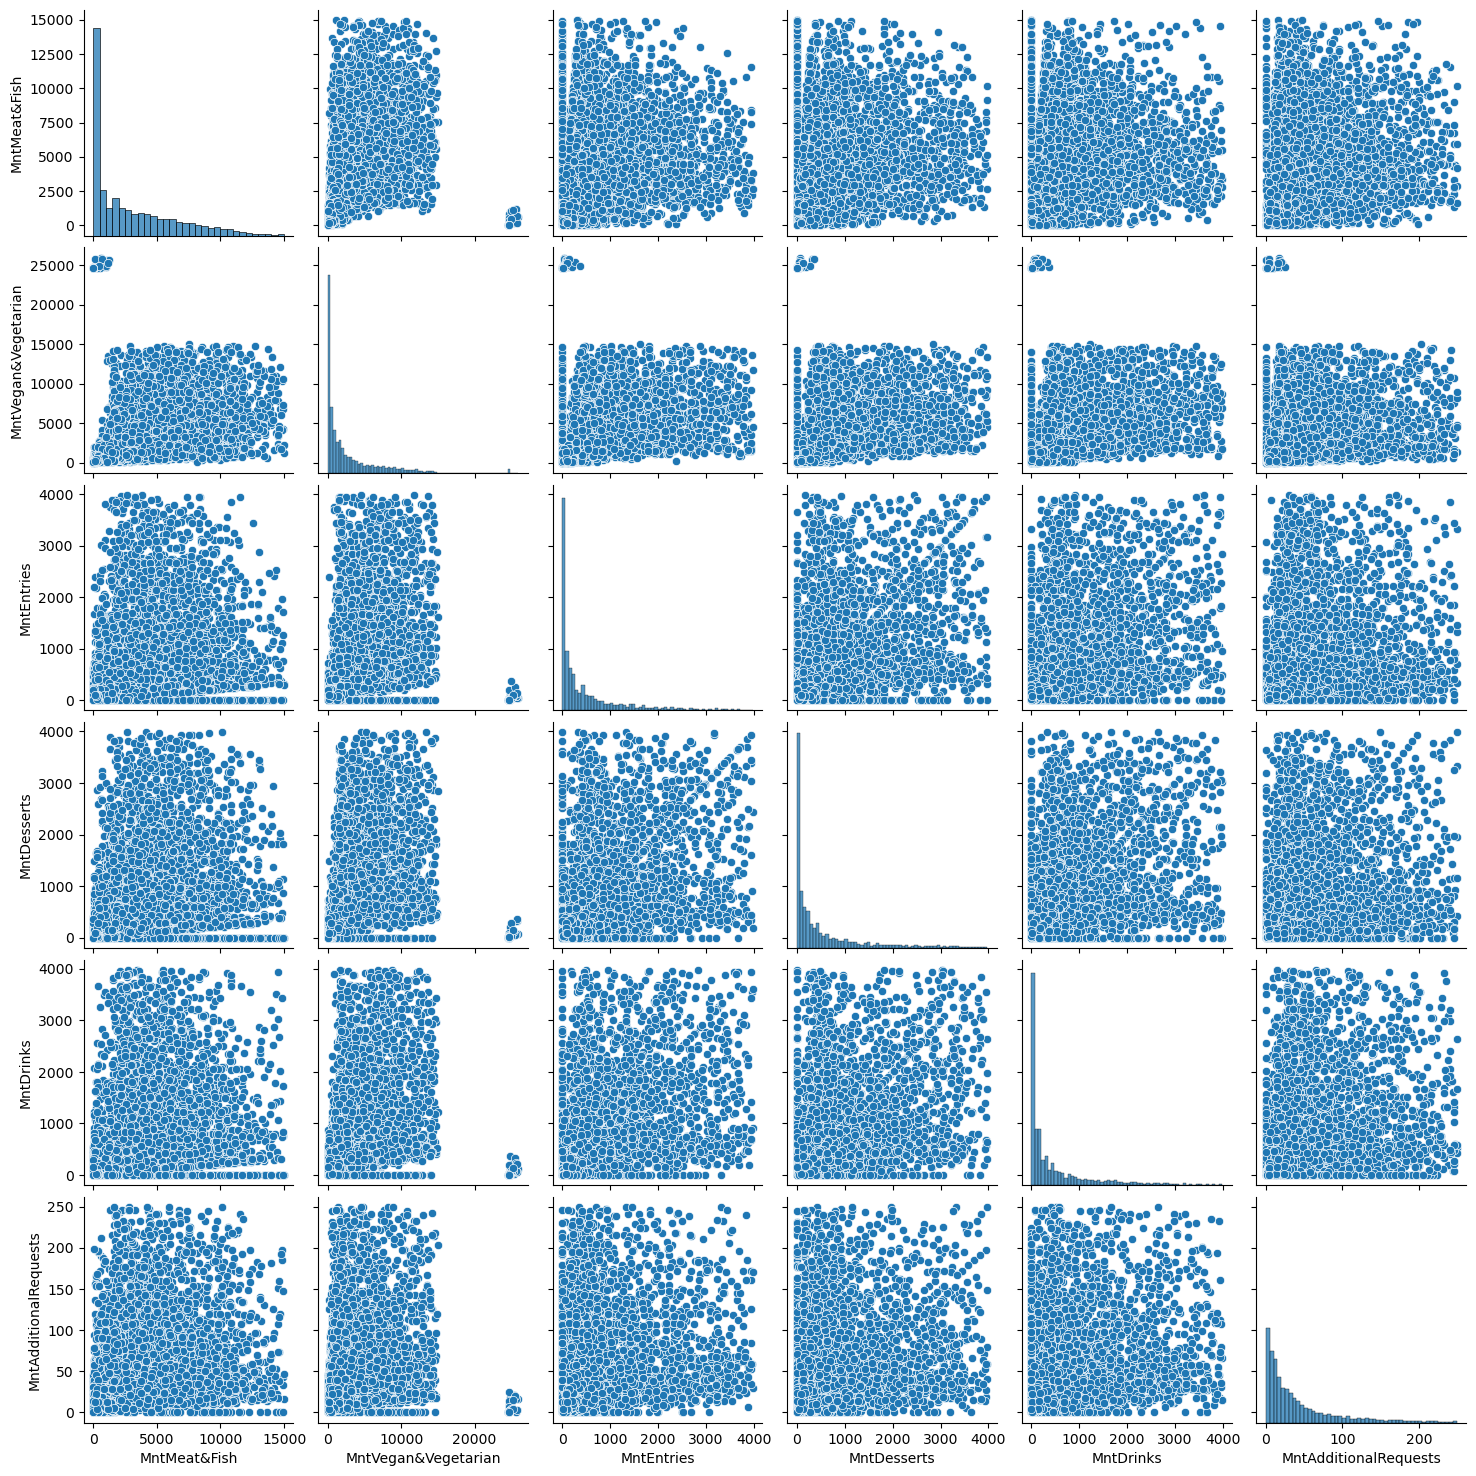

In [29]:
######################################################
######Fazer análise pairing com "teoria" por trás ####

sales_subset = sales[['MntMeat&Fish','MntVegan&Vegetarian','MntEntries','MntDesserts','MntDrinks','MntAdditionalRequests']].copy()
sns.pairplot(sales_subset)

In [31]:
sales_subset1 = sales[['NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases','NumStorePurchases','NumAppVisitsMonth']].copy()
sns.pairplot(sales_subset1)

In [32]:
sales_corr = sales.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))


x_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for x-axis
y_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for y-axis

sns.heatmap(sales_corr, annot=True, fmt = '.1g', 
            xticklabels=x_axis_labels,yticklabels=y_axis_labels,
           linewidth=0.5)

<AxesSubplot:>

In [33]:
sales_3std = 3 *(sales.std().round(2))
sales_3std

C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_21772\964286289.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales_3std = 3 *(sales.std().round(2))


Recency                     86.76
MntMeat&Fish             10111.14
MntEntries                2363.55
MntVegan&Vegetarian      11726.16
MntDrinks                 2415.45
MntDesserts               2406.66
MntAdditionalRequests      148.95
NumOfferPurchases            6.93
NumAppPurchases              8.25
NumTakeAwayPurchases         9.99
NumStorePurchases            9.90
NumAppVisitsMonth            8.25
Complain                     0.30
dtype: float64

In [34]:
subset_data=sales[sales["Recency"]>sales_3std['Recency']]
subset_data
#we have 915 outliers 

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
29627,2020-08-11 00:00:00,94.0,1790.0,608,12615.0,2860.0,680.0,35.0,5,7,6,7,4,0
25640,2021-01-28 00:00:00,95.0,250.0,40,315.0,40.0,60.0,16.0,2,4,1,3,7,0
25001,2022-06-15 00:00:00,96.0,5390.0,1780,12120.0,3940.0,3220.0,17.0,1,9,7,4,2,0
7235,2021-05-11 00:00:00,96.0,80.0,40,225.0,0.0,200.0,18.0,4,5,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,2021-09-21 00:00:00,99.0,13980.0,1440,11925.0,0.0,2400.0,24.0,1,6,9,5,1,0
24851,2020-09-10 00:00:00,94.0,730.0,1560,570.0,200.0,1000.0,91.0,2,4,2,8,5,0
28466,2021-03-14 00:00:00,91.0,310.0,100,330.0,120.0,180.0,28.0,3,5,1,4,8,0


In [35]:
#Impute MntDrinks

import pandas as pd
sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']] # we are using this variables to impute in drinks because they have a corr>0.7

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

In [36]:
sales['MntDrinks'] = sales_products['MntDrinks'].values
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 11054 to 25310
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Adherence         7000 non-null   object 
 1   Recency                6977 non-null   float64
 2   MntMeat&Fish           7000 non-null   float64
 3   MntEntries             7000 non-null   int64  
 4   MntVegan&Vegetarian    7000 non-null   float64
 5   MntDrinks              7000 non-null   float64
 6   MntDesserts            7000 non-null   float64
 7   MntAdditionalRequests  7000 non-null   float64
 8   NumOfferPurchases      7000 non-null   int64  
 9   NumAppPurchases        7000 non-null   int64  
 10  NumTakeAwayPurchases   7000 non-null   int64  
 11  NumStorePurchases      7000 non-null   int64  
 12  NumAppVisitsMonth      7000 non-null   int64  
 13  Complain               7000 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.

In [37]:
sales.isna().sum()

Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                 0
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
dtype: int64

In [94]:
#3.4 JOIN TABLES

In [95]:
crm.set_index ('CustomerID', inplace = True)

In [96]:
crm.index

Int64Index([14594, 19070, 29888, 12221, 21107, 28976, 33446, 33803,  5105,
            12974,
            ...
            26462, 34277, 10769, 11852, 32510, 30686, 17210, 29186, 23312,
            15581],
           dtype='int64', name='CustomerID', length=7000)

In [98]:
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [39]:
# merge the 'sales' and 'crm' tables based on 'CustomerID'
merged = pd.merge(sales, crm, on='CustomerID')

In [40]:
#--4 MERGED TABLE EXPLORATION I

In [41]:
merged

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,...,NumStorePurchases,NumAppVisitsMonth,Complain,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,...,13,6,0,Mr. Leonard Parr,1963,Graduation,Single,107153.0,0,1
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,...,9,6,0,Mr. Peter Duncan,1980,Master,Married,96725.0,0,1
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,...,3,9,0,Mr. Cameron MacDonald,1962,Graduation,Widow,84836.0,0,1
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,...,11,3,0,Mr. Tim Rampling,1971,Graduation,Together,100682.0,0,1
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,...,3,8,0,Miss Jan Brown,1964,Graduation,Together,65350.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,...,4,7,0,Mr. Justin Ball,1978,Master,Divorced,38970.0,1,0
6996,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,...,3,8,0,Mr. Benjamin Pullman,1984,Graduation,Married,55552.0,1,1
6997,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,...,13,4,0,Mr. Tim Brown,1954,Graduation,Married,97461.0,0,0
6998,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,...,2,8,1,Mr. Christian Underwood,1994,Graduation,Married,39333.0,1,0


In [42]:
merged.describe()

,CustomerID,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Birthyear,Income,Kid_Younger6,Children_6to18
count,7000.000000,6977.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,20066.401571,49.235058,3079.523800,534.749429,2785.050786,546.552057,540.656029,42.556186,2.448429,6.015714,3.834571,5.790571,5.278286,0.010286,1976.451429,77988.962407,0.440571,0.490571
std,8684.030062,28.922688,3370.377166,787.846684,3908.718244,806.300907,802.221866,49.650747,2.306968,2.745537,3.331142,3.295708,2.748596,0.100903,11.996270,35409.810253,0.543477,0.542174
min,5078.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,2493.800000,0.000000,0.000000
25%,12507.500000,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.000000,1967.000000,51586.250000,0.000000,0.000000
50%,20099.000000,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,5.000000,5.000000,0.000000,1977.000000,77190.000000,0.000000,0.000000
75%,27587.750000,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,8.000000,7.000000,0.000000,1985.000000,102016.250000,1.000000,1.000000
max,35072.000000,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,13.000000,20.000000,1.000000,2005.000000,237639.725000,2.000000,2.000000


In [43]:
merged.duplicated().sum()

0

In [44]:
import pandas as pd

def find_outlier_bounds(sales, *cols):
    """
    Takes a pandas DataFrame and one or more column names as arguments,
    and returns a dictionary containing the highest and lowest outlier values
    for each column.
    """
    bounds_dict = {}
    
    for col in cols:
        # calculate the IQR of the column
        q1 = sales[col].quantile(0.25)
        q3 = sales[col].quantile(0.75)
        iqr = q3 - q1

        # calculate the upper and lower bounds for outliers
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr

        # identify any values in the column that are above or below the bounds
        outliers = sales[(sales[col] > upper_bound) | (sales[col] < lower_bound)][col]

        # add the highest and lowest outlier values to the dictionary
        bounds_dict[col] = {'upper': outliers.max(), 'lower': outliers.min()}
        
    return bounds_dict

In [45]:
bounds_dict = find_outlier_bounds(sales,'Recency','MntMeat&Fish','MntEntries','MntVegan&Vegetarian','MntDesserts','MntDrinks', 'MntAdditionalRequests','NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases','NumStorePurchases','NumAppVisitsMonth')
print(bounds_dict)

{'Recency': {'upper': nan, 'lower': nan}, 'MntMeat&Fish': {'upper': 14980.0, 'lower': 12350.0}, 'MntEntries': {'upper': 3980, 'lower': 1660}, 'MntVegan&Vegetarian': {'upper': 25974.0, 'lower': 9135.0}, 'MntDesserts': {'upper': 3980.0, 'lower': 1660.0}, 'MntDrinks': {'upper': 3980.0, 'lower': 1700.0}, 'MntAdditionalRequests': {'upper': 249.0, 'lower': 130.0}, 'NumOfferPurchases': {'upper': 16, 'lower': 7}, 'NumAppPurchases': {'upper': nan, 'lower': nan}, 'NumTakeAwayPurchases': {'upper': 24, 'lower': 12}, 'NumStorePurchases': {'upper': nan, 'lower': nan}, 'NumAppVisitsMonth': {'upper': 20, 'lower': 19}}
